In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/final_music_dataset.csv")

In [ ]:
features = df.drop(columns=['track', 'artist', 'language'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

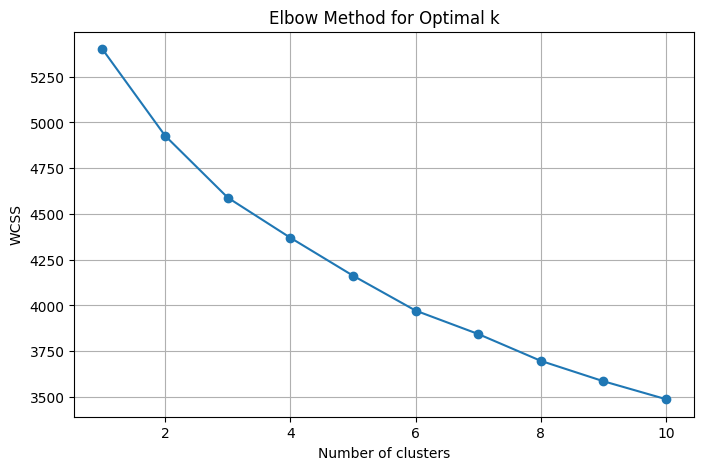

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_df)

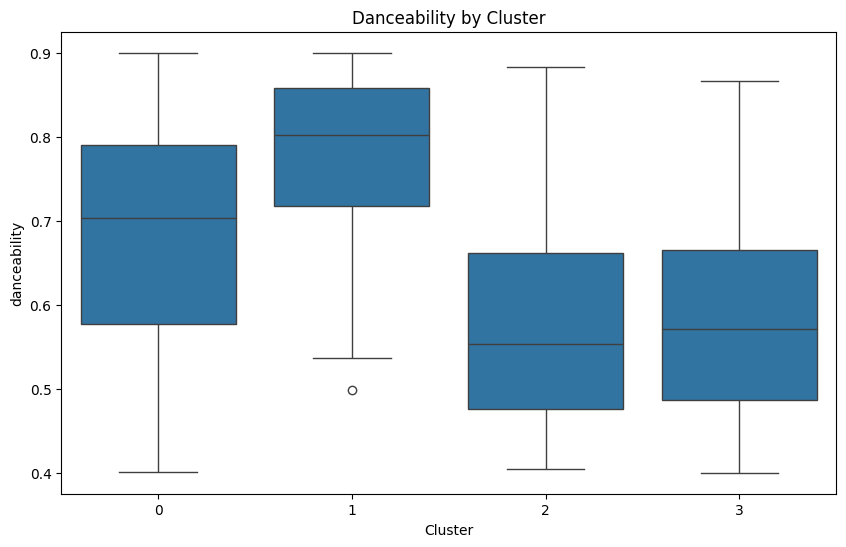

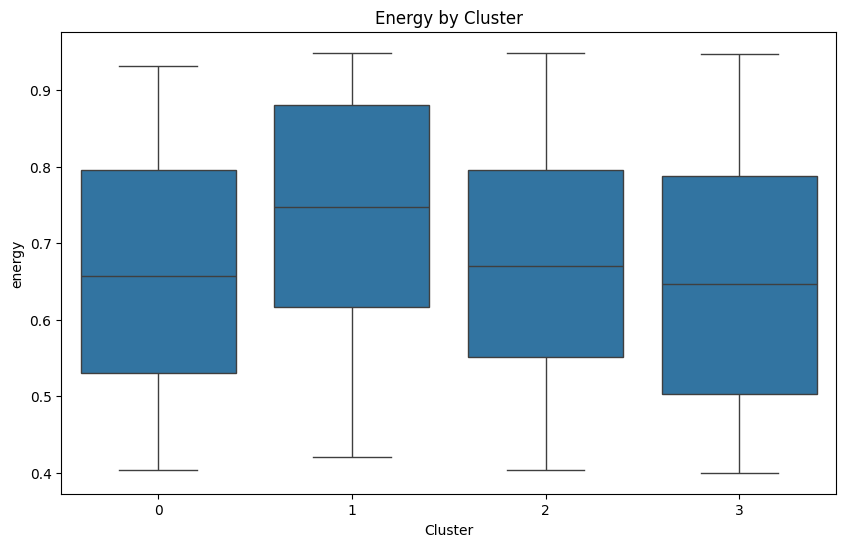

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster', y='danceability', data=df)
plt.title('Danceability by Cluster')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster', y='energy', data=df)
plt.title('Energy by Cluster')
plt.show()

In [ ]:
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print("Cluster Summary:\n", cluster_summary)

Cluster Summary:
          danceability    energy   valence       tempo  acousticness  \
Cluster                                                               
0            0.678654  0.666314  0.518404  118.727949      0.616321   
1            0.782774  0.737610  0.573568  123.391164      0.314740   
2            0.572507  0.669707  0.588413  130.557533      0.370120   
3            0.580108  0.647216  0.560561  110.005676      0.554385   

         instrumentalness  speechiness  liveness    duration_ms  
Cluster                                                          
0                0.468429     0.107263  0.277962  259606.057692  
1                0.216705     0.106007  0.309822  245146.342466  
2                0.315280     0.093260  0.223120  211553.560000  
3                0.174973     0.151838  0.302953  241413.918919  


In [ ]:
def recommend_similar_songs(song_name):
    cluster = df[df['track'].str.lower() == song_name.lower()]['Cluster']
    if cluster.empty:
        print("Song not found.")
        return
    cluster_id = cluster.values[0]
    recommendations = df[df['Cluster'] == cluster_id][['track', 'artist']].sample(5)
    print("\nRecommended Songs from same cluster:\n", recommendations)

In [ ]:
recommend_similar_songs("Kesariya")


Recommended Songs from same cluster:
                        track         artist
394                 Memories       Maroon 5
310         Someone Like You          Adele
13                   Peaches  Justin Bieber
70                   Perfect     Ed Sheeran
508  Tujhe Kitna Chahne Lage   Arijit Singh
